In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
#connecting to database
con = sqlite3.connect('C:\\Users\\Administrator\\Downloads\\database.sqlite')
print(type(con))

<class 'sqlite3.Connection'>


In [3]:
#loading dataset into code
df = pd.read_sql_query('SELECT * FROM Reviews',con)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# SENTIMENT ANALYSIS

In [4]:
!pip install TextBlob

In [5]:
from textblob import TextBlob

In [6]:
#calculating polarity of summary column (+1 means positive, -1 means negative) and appending it as a list

polarity=[]
for i in df['Summary']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)                  #appending 0 in case of empty row   

In [7]:
#creating a new column called Polarity

df['Polarity']=polarity
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8


EDA FOR POSITIVE SENTIMENTS

In [8]:
#extracting data with positive polarity (positive sentiments)

positive_data = df[df['Polarity']>0]

In [9]:
#word clouds are helpful for representing a particular word which is most frequently used (part of EDA)

!pip install wordcloud

In [10]:
#STOPWORDS like he, she, it, which don't add meaning to analysis

from wordcloud import WordCloud, STOPWORDS

In [11]:
#extracting unique stopwords
stopwords = set(STOPWORDS)

In [12]:
#obtaining all the positive sentiments together as a string

total_positive = ' '.join(positive_data['Summary'])

#printing first 10000 words
total_positive[:1000]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [13]:
#cleaning the total_positive data

import re
#substitute function
total_positive = re.sub('[^a-zA-Z]', ' ', total_positive)  #keep a-z and A-Z in data and replace everything else with space on total_positive data

#printing first 1000 words
total_positive[:1000]          #extra spaces indicate remove of non-alphabet characters

'Good Quality Dog Food Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Love it  GREAT SWEET CANDY  Always fresh Delicious product  Great Bargain for the Price The Best Hot Sauce in the World Great machine  Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry  satisfying Love Gluten Free Oatmeal    GOOD WAY TO START THE DAY     Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns  Tastes great  Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT   And good   Came back for more     Roasts up a smooth brew Our guests love it  Awesome Deal  Awsome   Kids in neighborhood loved us  great deal  Better price for this at Target great source of electrolytes Great for preventing cramps Tast

In [14]:
total_positive = re.sub(' +',' ', total_positive )  #replacing extra spaces with only one space
print(total_positive[:1000])                        #printing first 1000 words   (no extra spaces!)

Good Quality Dog Food Great taffy Nice Taffy Great Just as good as the expensive brands Wonderful tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this diet food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy Love it GREAT SWEET CANDY Always fresh Delicious product Great Bargain for the Price The Best Hot Sauce in the World Great machine Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry satisfying Love Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns Tastes great Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT And good Came back for more Roasts up a smooth brew Our guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Target great source of electrolytes Great for preventing cramps Taste is not so good How much would you 

WORD CLOUD FOR DETERMINING HIGH FREQUENCY OF POSITIVE WORDS

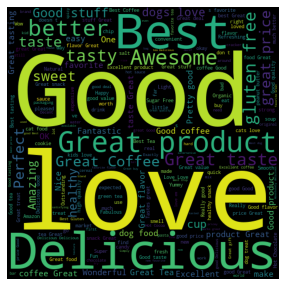

In [15]:
wordcloud = WordCloud(width=500, height=500, stopwords=stopwords).generate(total_positive)
plt.figure(figsize=(15,5))
plt.axis('off')
plt.imshow(wordcloud)

EDA FOR NEGATIVE SENTIMENTS

In [16]:
#extracting data with negative polarity (negative sentiments)

negative_data = df[df['Polarity']<0]

In [17]:
#obtaining all the negative sentiments together as a string

total_negative = ' '.join(negative_data['Summary'])

#printing first 10000 words
total_negative[:1000]

"poor taste Nasty No flavor How can you go wrong! pretty expensive stale product. Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS! Tasteless but low calorie Marley's Mellow Mood Lite - Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK!!!! Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don't Waste Your Money Disappointed! sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee... Fantastic Chicken Noodle soup Heinz no more! Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping. poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but

In [18]:
#cleaning the total_negative data

import re
#substitute function
total_negative = re.sub('[^a-zA-Z]', ' ', total_negative)  #keep a-z and A-Z in data and replace everything else with space on total_positive data

#printing first 1000 words
total_negative[:1000]          #extra spaces indicate remove of non-alphabet characters

'poor taste Nasty No flavor How can you go wrong  pretty expensive stale product  Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS  Tasteless but low calorie Marley s Mellow Mood Lite   Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK     Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed  sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee    Fantastic Chicken Noodle soup Heinz no more  Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping  poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but

In [19]:
total_negative = re.sub(' +',' ', total_negative )  #replacing extra spaces with only one space
print(total_negative[:1000])                        #printing first 1000 words   (no extra spaces!)

poor taste Nasty No flavor How can you go wrong pretty expensive stale product Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS Tasteless but low calorie Marley s Mellow Mood Lite Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee Fantastic Chicken Noodle soup Heinz no more Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but a little hard t

WORD CLOUD FOR DETERMINING HIGH FREQUENCY OF NEGATIVE WORDS

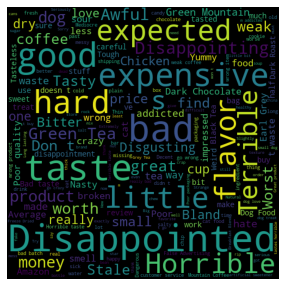

In [20]:
wordcloud = WordCloud(width=500, height=500, stopwords=stopwords).generate(total_negative)
plt.figure(figsize=(15,5))
plt.axis('off')
plt.imshow(wordcloud)

# HOW AMAZON RECOMMENDS PRODUCTS

In [21]:
#obtaining unique userID
df['UserId'].unique()

array(['A3SGXH7AUHU8GW', 'A1D87F6ZCVE5NK', 'ABXLMWJIXXAIN', ...,
       'A28KG5XORO54AY', 'A121AA1GQV751Z', 'A3LGQPJCZVL9UC'], dtype=object)

In [22]:
grouped = df.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values('Text',ascending=False)

#how much number of feedbacks, mean of score given, number of products purchased, then we sorted users bsed on highest number of reviews(text)
grouped

,Summary,Text,Score,ProductId
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
...,...,...,...,...
A2HROKQO0GA5AF,1,1,3.000000,1
A2HROR28DMJV2W,1,1,5.000000,1
A2HRR8CO2Y20G8,1,1,5.000000,1


In [23]:
#obtaining top 10
grouped_10 = grouped.head(10)
grouped_10

,Summary,Text,Score,ProductId
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
A1TMAVN4CEM8U8,204,204,4.833333,204
A2MUGFV2TDQ47K,201,201,3.751244,201
A3TVZM3ZIXG8YW,199,199,1.000000,199
A3PJZ8TU8FDQ1K,178,178,4.601124,178


In [24]:
#changing column names
grouped_10.columns = ['Number of Summaries','Number of Texts','Average Score','Number of Products Purchased']
grouped_10

,Number of Summaries,Number of Texts,Average Score,Number of Products Purchased
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
A1TMAVN4CEM8U8,204,204,4.833333,204
A2MUGFV2TDQ47K,201,201,3.751244,201
A3TVZM3ZIXG8YW,199,199,1.000000,199
A3PJZ8TU8FDQ1K,178,178,4.601124,178


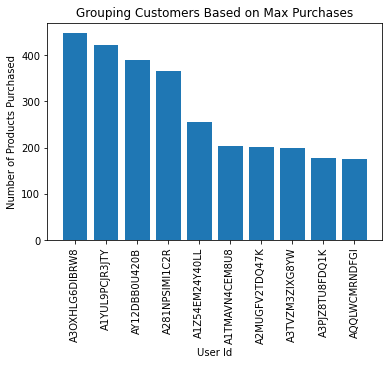

In [25]:
#visualizing
plt.bar(grouped_10.index, grouped_10['Number of Products Purchased'])
plt.title('Grouping Customers Based on Max Purchases')
plt.xlabel('User Id')
plt.ylabel('Number of Products Purchased')
plt.xticks(rotation = 'vertical')
plt.show()

Amazon will recommend these top 10 customers more products as they are most likely to purchase

# ANALYZING FEEDBACK GIVING BY CUSTOMERS

1. Analyzing length of comments whether customers are going to give lengthy or short comment
2. Analyzing Score

In [26]:
#checking for null values
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Polarity                  0
dtype: int64

In [27]:
#checking for duplicacy
df.duplicated().sum()

0

No null or duplicate values, we can proceed further

In [28]:
#Determining length of text
len_text=[]
for i in df['Text']:
    len_text.append(len(i.split(' ')))
len_text    

[49,
 31,
 99,
 43,
 30,
 72,
 53,
 28,
 26,
 25,
 149,
 68,
 79,
 15,
 22,
 24,
 42,
 27,
 131,
 30,
 46,
 45,
 27,
 20,
 61,
 14,
 22,
 38,
 95,
 149,
 89,
 18,
 203,
 94,
 94,
 74,
 44,
 47,
 106,
 51,
 112,
 228,
 31,
 37,
 44,
 40,
 50,
 23,
 50,
 40,
 19,
 77,
 220,
 35,
 66,
 62,
 36,
 36,
 28,
 23,
 30,
 30,
 17,
 180,
 54,
 32,
 139,
 91,
 42,
 18,
 70,
 125,
 74,
 314,
 16,
 19,
 100,
 60,
 25,
 36,
 39,
 26,
 445,
 80,
 63,
 50,
 82,
 37,
 127,
 50,
 38,
 22,
 43,
 189,
 24,
 61,
 158,
 58,
 80,
 38,
 34,
 19,
 49,
 35,
 33,
 52,
 16,
 80,
 55,
 134,
 31,
 56,
 349,
 24,
 59,
 23,
 40,
 94,
 298,
 133,
 76,
 94,
 82,
 128,
 94,
 57,
 50,
 42,
 39,
 47,
 40,
 51,
 48,
 72,
 22,
 74,
 62,
 27,
 23,
 102,
 48,
 47,
 58,
 72,
 91,
 85,
 171,
 34,
 39,
 35,
 55,
 26,
 24,
 47,
 61,
 75,
 36,
 22,
 88,
 44,
 26,
 34,
 62,
 46,
 48,
 68,
 29,
 83,
 36,
 46,
 39,
 57,
 43,
 211,
 133,
 49,
 48,
 50,
 32,
 68,
 48,
 20,
 165,
 124,
 20,
 24,
 407,
 31,
 82,
 59,
 27,
 46,
 54,
 89,
 

<AxesSubplot:>

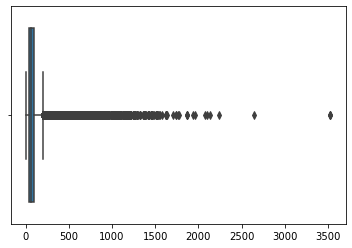

In [29]:
#making a boxplot
sns.boxplot(x = len_text)

We see almost all the users will give a shorter feedback (<250 words) as the users which give a lengthy feedback are the outliers

<AxesSubplot:xlabel='Score', ylabel='count'>

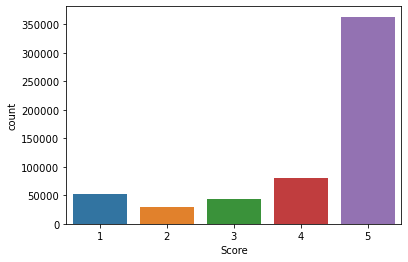

In [30]:
#analyzing score
sns.countplot( x = df['Score'])

Most customers will give a high rating/ scores (5 starts) to products on Amazon

# ANALYZING BEHAVIOUR OF CUSTOMERS

In [31]:
import string
punctuation = string.punctuation
def remove_punc(review): #writing def for removing punctuation. We did not use re because it will remove numbers and here numbers are imp (100 calories, 100 is imp)                                                    
    no_punc = ''
    for char in review:
        if char not in punctuation:
            no_punc = no_punc+char
    return no_punc        

df['Text'] = df['Text'].apply(remove_punc)                 #applying remove punctuation code foor all i in df['Text']

In [32]:
df['Text'][164]            #removed all special characters without removing numbers. Printing and seeing for any random i

'Seriously this product was as tasteless as they come There are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack You just have to season it or combine it with something else to share the flavor'

In [44]:
#filtering stopwords

import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
def remove_stopwords(review):
    return ' '.join([word for word in review.split(' ') if word not in set(stopwords.words('english'))])   #removing stopwords and obaining can a string (can be done with for loop too)                 
df['Text'] = df['Text'].apply(remove_stopwords)

KeyboardInterrupt: 